# Purpose: To build out the skeleton Pseudo Code for this project

__For now__: Moving my notes from my one one one with Elizabeth and will build out more in the next few days

1. Input .csv from experimental team to describe data
2. CSV pulls the proper images from NDP (or wherever best storage location is determined to be)
2a. There needs to be some integration with NDP to break the image into chunks with the appropriate zoom and then provide the original slice with locations of test and training images printed out.
2b. I think to do this we are going to have to register the image to some kind of atlas... or somethign to determine regions so that the code can grab pictures
3. Images need to be split
3a. Regionally
3b. Test Groups
3c. Into Small enough sizes for most efficient processing by package
3d. Magifications
4. Threshold and segment
4a. Ifthresholds (for general object identification) [July]
4b. + Skeletonization (for specific highly branched morphometric analysis) [Robin]
5. Split data into testing and training groups
6. Shape factor analysis on both models (before ML model)
7. Feed 4(1) and 4(2) separately to modified VAMPIRE package to build models
8. Store created models
9. Test models with testing data sets
10. Data output
11. Comprehensive CSV for optional additional analysis
12. Data Visualization
13. Save all data into some storage location (Google Drive?)


Other Notes: 
1. Modified VAMPIRE package: Worth forking the Wirtz lab repository now and building on by ourselves possibly – adding that fork to our repository - COMPLETE
2. Want a repository that works through Binder? Preferably so the Neonatalogy lab can do this straight through a web interface
3. Along with outputs want to output the variables used for all of the steps on days that experiments were run with an easy print out maybe for lab notebook storage? (A way to integrate the electronic lab notebook I want to get more fine tuned for our lab with a standard lab notebook - and provide some under the hood knowledge for Neonatology)

4. Add in an optimization step for what size of image is sufficient for cropping down the whole scan images 
5. Including an analysis before creating that analysis that selects the best # of shape modes and #coordinate points – maybe we could reach out the Denis Wirtz lab about this or build in our own integration



Current Goal:

1. Get a bunch of images from a slice of the ferret brain
2. Put them in a folder
3. Perform thresholding within the Jupyter Notebook
3. Integrate vampire into the Jupyter Notebook
4. Run those images and get an output within the notebook or specific folder (which should will need a results output)
5. Save all of this information to some results folder
6. See if it works in binder

Next Goals:
1. Build out ifthresholds more for immunohistochemistry stains
2. Build in NDP regional registration and automatic image breakdown
3. Integrate Google Drive
4. New visualizations based on what came from paper
5. Statistics possibly with Rthon
6. Speed up any slow processes with Cython
7. Integrate ifThresholds to pick and perform the best thresholding (or integrate a step to say whether this needs to be done or not)

*Step 1: Import necessary packages*

In [42]:
import numpy as np
import os

from skimage import io
from skimage import filters


%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

from PIL import Image

*Step 2: User Inputs*

In [4]:
data_folder = '/Users/hhelmbre/Desktop/fiberf_data'

*Step 3: Threshold and Segment Images*

Step 3a: Import and threshold images from 'data_folder'

In [7]:
#Getting a list of all the files in the input data folder
image_list = os.listdir(data_folder)

practice images to figure out loop below

In [21]:
practice_image = image_list[1]
practice_image = io.imread(str(data_folder + '/' + practice_image))
practice_image.shape

(614, 1419, 3)

In [23]:
practice_image1 = practice_image[:,:,0]
practice_image2 = practice_image[:,:,1]
practice_image3 = practice_image[:,:,2]

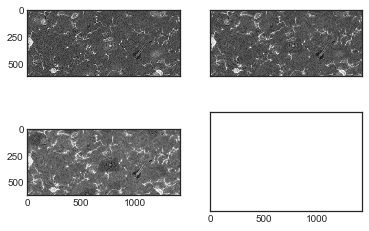

In [40]:
fig, ax = plt.subplots(2, 2, sharex='col', sharey='row')
ax[0,0].imshow(practice_image1)
ax[0,1].imshow(practice_image2)
ax[1,0].imshow(practice_image3)

#Need to do work in future to figure out which of these is best to use? or whether we use more than one

*back to what will be the main code*

In [43]:
#Looping through all images in list (this task should be put to multiple CPUs in future if a large data set)
for images in image_list:
    im = io.imread(str(data_folder + '/' + images))
    im = im[:,:,2]
    threshold = filters.threshold_otsu(im)
    binary = im > threshold
    
    im_to_save = Image.fromarray(binary)
    im_to_save.save('threshold1.jpg')

*Step 4: Train and Test Split Images*

*Step 5: Build model using VAMPIRE*

*Step 6: Apply model using VAMPIRE*

*Step 7: New visualization of VAMPIRE data*

- This should probably be built into VAMPIRE and not just into this notebook - think about this for the future